# audiolazy

[back to overview page](index.ipynb)

http://pythonhosted.org/audiolazy/getting_started.html

In [1]:
import audiolazy as lz
from audiolazy import z
%matplotlib inline

In [2]:
a = lz.Stream(2, -2, -1)
a

In [3]:
b = lz.Stream(3, 7, 5, 4)

In [4]:
c = a + b
c

In [5]:
c.take(15)

[5, 5, 4, 6, 1, 6, 7, 2, 2, 9, 3, 3, 5, 5, 4]

In [6]:
a = lz.Stream([1, 2, 3, 2, 1])  # finite

In [7]:
b = lz.Stream(3, 7, 5, 4)  # periodic

In [8]:
c = a + b

In [9]:
list(c)

[4, 9, 8, 6, 4]

In [10]:
filt = 1 - z ** -1
filt

1 - z^-1

In [11]:
type(filt)

audiolazy.lazy_filters.ZFilter

In [12]:
filt.is_causal(), filt.is_lti()

(True, True)

In [13]:
data = filt([.1, .2, .4, .3, .2, -.1, -.3, -.2])
data

In [14]:
data *= 10

In [15]:
list(data)

[1.0,
 1.0,
 2.0,
 -1.0000000000000004,
 -0.9999999999999998,
 -3.0000000000000004,
 -1.9999999999999998,
 0.9999999999999998]

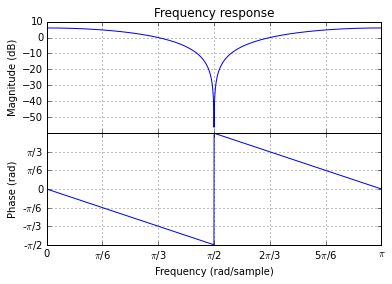

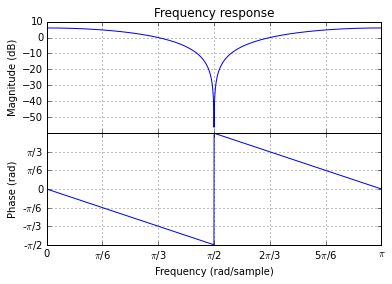

In [16]:
(1 + z ** -2).plot()

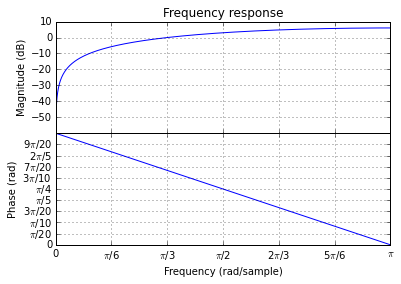

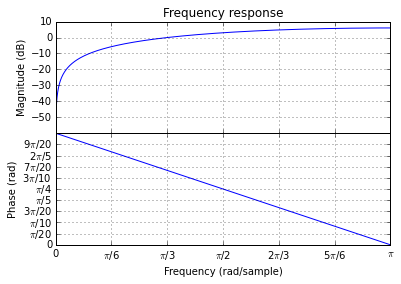

In [17]:
filt.plot()

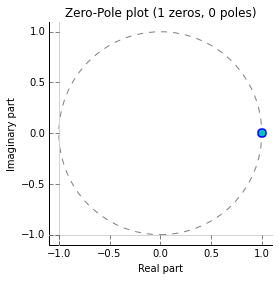

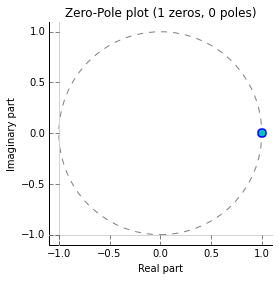

In [18]:
filt.zplot()

In [19]:
filt1 = lz.CascadeFilter(0.2 - z ** -3)  # 3 zeros
filt1

[0.2 - z^-3]

In [20]:
filt2 = lz.CascadeFilter(1 / (1 -.8 * z ** -1 + .6 * z ** -2))  # 2 poles
filt2

[             1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2]

In [21]:
# Here __add__ concatenates and __mul__ by an integer make reference copies
filt = (filt1 * 5 + filt2 * 10) # 15 zeros and 20 poles
filt

[0.2 - z^-3, 0.2 - z^-3, 0.2 - z^-3, 0.2 - z^-3, 0.2 - z^-3,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2,              1
 ---------------------------
 1 - 0.8 * z^-1 + 0.6 * z^-2]

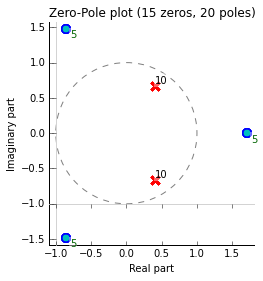

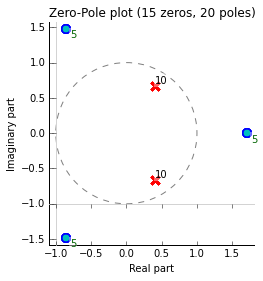

In [22]:
filt.zplot()

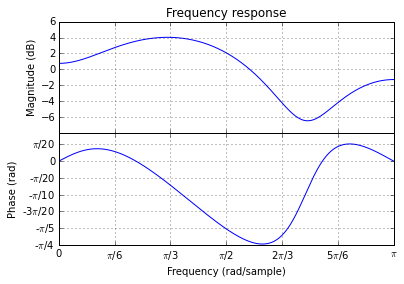

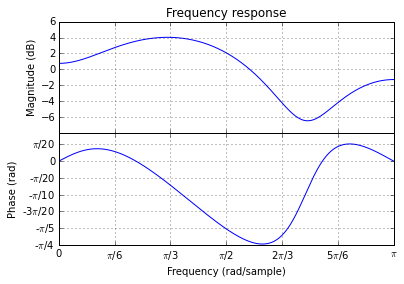

In [23]:
lz.lpc([1, -2, 3, -4, -3, 2, -3, 2, 1], order=3).plot()

In [24]:
data = lz.Stream(-1., 0., 1., 0.)  # periodic
blk = data.take(200)

In [25]:
analysis_filt = lz.lpc.covar(blk, 4)
analysis_filt

1 + 0.5 * z^-2 - 0.5 * z^-4

In [26]:
residual = analysis_filt(blk)
residual

In [27]:
residual.take(10)

[-1.0,
 0.0,
 0.5,
 0.0,
 -1.6653345369377348e-16,
 0.0,
 1.6653345369377348e-16,
 0.0,
 -1.6653345369377348e-16,
 0.0]

In [28]:
synth_filt = 1 / analysis_filt
synth_filt(residual).take(10)

[1.6653345369377348e-16,
 0.0,
 -2.498001805406602e-16,
 0.0,
 3.7470027081099033e-16,
 0.0,
 -4.787836793695988e-16,
 0.0,
 5.932754287840679e-16,
 0.0]

In [29]:
amplified_blk = list(lz.Stream(blk) * -200)  # for alignment w/ DFT

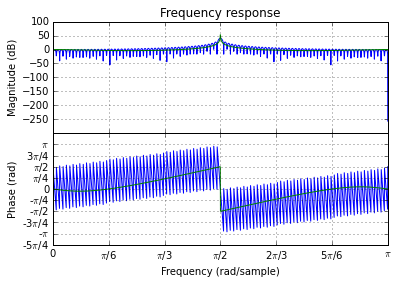

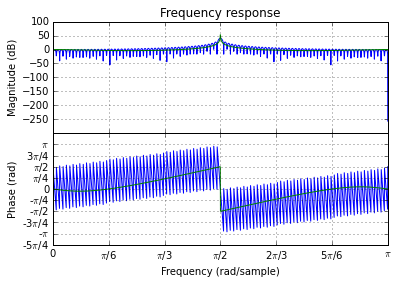

In [30]:
synth_filt.plot(blk=amplified_blk)

In [31]:
rate = 44100  # sampling rate, in samples/second
s, Hz = lz.sHz(rate) # seconds and Hertz
ms = 1e-3 * s

In [32]:
s, Hz

(44100.0, 0.00014247585730565955)

In [33]:
note1 = lz.karplus_strong(440 * Hz)  # pluck "digitar" synth
note1

In [34]:
note2 = lz.zeros(300 * ms).append(lz.karplus_strong(880 * Hz))
note2

In [35]:
notes = (note1 + note2) * .5

In [36]:
sound = notes.take(int(2 * s))  # 2 seconds of a Karplus-Strong note

In [37]:
with lz.AudioIO(True) as player:  # True means "wait for all sounds to stop"
    player.play(sound, rate=rate)

In [38]:
import sounddevice as sd

In [39]:
sd.play(sound, rate)

http://pythonhosted.org/audiolazy/audiolazy.html

In [40]:
delay_a4 = lz.freq_to_lag(440 * Hz)
delay_a4

100.22727272727272

In [41]:
filt = lz.ParallelFilter(lz.comb.tau(delay_a4, 20 * s), lz.resonator(440 * Hz, bandwidth=100 * Hz))
filt

[                 1
 ------------------------------------
 1 - 0.999886 * z^-100.22727272727272,             0.000891948
 ------------------------------------
 1 - 1.98185 * z^-1 + 0.985853 * z^-2]

In [42]:
len(filt)

2

In [43]:
lz.comb.tau(3)

   1
--------
1 - z^-3

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>